<a href="https://colab.research.google.com/github/MMathisLab/DeepLabCut-Workshop-Materials/blob/master/demos_colab/DeepLabCut_ParentingMouse_Colab_VideoAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://camo.githubusercontent.com/71523c879284afa1c51b8489491f06d24d1ff02d75dca9f71078535ee6b1978e/68747470733a2f2f696d616765732e73717561726573706163652d63646e2e636f6d2f636f6e74656e742f76312f3537663664353163396637343536366635356563663237312f313632383235303030343232392d4b565944374a4a5648594546444a33324c39564a2f444c436c6f676f323032312e6a70673f666f726d61743d3130303077)

👋 This notebook is a modified copy from [Github](https://colab.research.google.com/github/DeepLabCut/DeepLabCut/blob/master/examples/COLAB/COLAB_YOURDATA_TrainNetwork_VideoAnalysis.ipynb), originally written by Mackenzie Mathis and contributors.

📝 This notebook accompanies Nath, Mathis et al. 2019 Nature Protocols https://www.nature.com/articles/s41596-019-0176-0, which is the DeepLabCut 2.0 version of  publication: Mathis et al 2018, https://doi.org/10.1038/s41593-018-0209-y. Original source: https://github.com/DeepLabCut/DeepLabCut

⚠️ It has been edited for the 2023 Crick Hackathon !


This notebook illustrates how to use DeepLabCut and Colab to:
- load a pretrained model from the maDLC "parenting mouse" dataset, which id described here: https://benchmark.deeplabcut.org/datasets.html
- analyze videos, filter data, create video w/keypoints
- Fine-tune this model with your data 🔥


## First, go to "Runtime" ->"change runtime type"->select "Python3", and then select "GPU"


In [ ]:
#(this will take a few minutes to install all the dependences!)
!pip install deeplabcut[tf]
!pip install tensorflow==2.10 # just to be sure

**(Be sure to click "RESTART RUNTIME" if it is displayed above before moving on !)**

## Download our data:



In [ ]:
# Download our demo project:
import requests
from io import BytesIO
from zipfile import ZipFile

url_record = 'https://zenodo.org/api/records/8367716'
response = requests.get(url_record)
if response.status_code == 200:
    file = response.json()['files'][0]
    title = file['key']
    print(f"Downloading {title}...")
    with requests.get(file['links']['self'], stream=True) as r:
        with ZipFile(BytesIO(r.content)) as zf:
            zf.extractall(path='/content')
else:
    raise ValueError(f'The URL {url_record} could not be reached.')

#clean up
!rm -r /content/__MACOSX

## Import Dependencies


In [ ]:
#no need to change anything:
import matplotlib
import os
import deeplabcut
from base64 import b64encode
from IPython.display import HTML

project_path = "/content/CrackingParenting-Mostafizur-2021-03-24"
config_path = os.path.join(project_path, "config.yaml")

# we need to update one variable in the config for this model, so we do that here:
#edits = {'TrainingFraction': - 0.7}
#deeplabcut.auxiliaryfunctions.edit_config(config_path, edits)

## Start Analyzing a video with our pretrained model!
This function analyzes your video(s).

The results are stored in hd5 file in the same directory where the video resides. The data is optionally also exported in comma-separated values format (.csv).

In [ ]:
#You can change this to be an uploaded video in Colab. On the left upload or drag&drop!
video = '/content/short-parenting.mp4'

deeplabcut.analyze_videos(config_path,[video], shuffle=1,videotype="mp4",auto_track=True )


Using snapshot-60000 for model /content/CrackingParenting-Mostafizur-2021-03-24/dlc-models/iteration-0/CrackingParentingMar24-trainset70shuffle1


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Activating extracting of PAFs


/usr/local/lib/python3.10/dist-packages/deeplabcut/utils/auxfun_multianimal.py:83: UserWarning: default_track_method` is undefined in the config.yaml file and will be set to `ellipse`.
  warnings.warn(


Starting to analyze %  /content/short-parenting.mp4
Video already analyzed! /content/short-parentingDLC_dlcrnetms5_CrackingParentingMar24shuffle1_60000.h5
Using snapshot-60000 for model /content/CrackingParenting-Mostafizur-2021-03-24/dlc-models/iteration-0/CrackingParentingMar24-trainset70shuffle1
Processing...  /content/short-parenting.mp4
Tracklets already computed /content/short-parentingDLC_dlcrnetms5_CrackingParentingMar24shuffle1_60000_el.pickle
Set overwrite = True to overwrite.
The tracklets were created (i.e., under the hood deeplabcut.convert_detections2tracklets was run). Now you can 'refine_tracklets' in the GUI, or run 'deeplabcut.stitch_tracklets'.
Processing...  /content/short-parenting.mp4



100%|██████████| 2/2 [00:00<00:00, 16912.52it/s]

The videos are analyzed. Time to assemble animals and track 'em... 
 Call 'create_video_with_all_detections' to check multi-animal detection quality before tracking.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_dlcrnetms5_CrackingParentingMar24shuffle1_60000'

You can also now filter your data to smooth any small jitters:

In [ ]:
deeplabcut.filterpredictions(config_path,[video], shuffle=1,videotype="mp4")

Filtering with median model /content/short-parenting.mp4
Data from short-parenting were already filtered. Skipping...


## Plot the trajectories of the analyzed videos:
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [ ]:
deeplabcut.plot_trajectories(config_path,[video], shuffle=1,videotype="mp4", filtered=True)

Loading  /content/short-parenting.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory


Now you can look at the plot-poses file and check the "plot-likelihood.png" might want to change the "p-cutoff" in the config.yaml file so that you have only high confidnece points plotted in the video. i.e. ~0.8 or 0.9. The current default is 0.4.

## Create labeled video
This function is for visualization purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides.

In [ ]:
deeplabcut.create_labeled_video(config_path,[video], shuffle=1,videotype="mp4", filtered=True, fastmode=False)

Starting to process video: /content/short-parenting.mp4
Loading /content/short-parenting.mp4 and data.
Labeled video already created. Skipping...


[None]

In [ ]:
from base64 import b64encode
from IPython.display import HTML
video_name = os.path.splitext(video)[0]

view_video = open(video_name+'DLC_dlcrnetms5_CrackingParentingMar24shuffle1_60000_el_filtered_bp_labeled.mp4','rb').read()

data_url = "data:video/mp4;base64," + b64encode(view_video).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#Onwards...

- This model was trained on highly related data to this video and nothing else -- therefore we expect the generalization to new videos that look different to be poor. Therefore, the goal of this Hackathon is to make a better model! 🔥

- We will employ the power of transfer learning 🦾 to fine-tune this model on YOUR data!

- Therefore, let's get started with your data.

[1]  you should transition to the DLC GUI on your local machine. You don't need Colab for now. Read this though!

[2] There, you can each "create a new project" independently, but to simply things, **please use the same information**:

**Project: MouseParenting**

**Name: Crick**

**And CLICK:** "multi-animal project!"


[3] Upload your videos!

[4] Create the project, then immediately open the `config.yaml` file that you find the the folder that was created

[5] **Attention here**, please use these bodypart names, so copy/paste into the correct place in your config.yaml file:



```
individuals:
- p1
- p2

#-single >> for label!
uniquebodyparts:
- snout
- leftear
- rightear
- shoulder
- spine1
- spine2
- spine3
- spine4
- tailbase
- tail1
- tail2
- tailend
multianimalbodyparts:
- end1
- interm1
- interm2
- interm3
- end2
```

*Here, we assume you have TWO pups to label...



#NEXT: Labeling

Proceed to label the data in the GUI and try to match the following template:

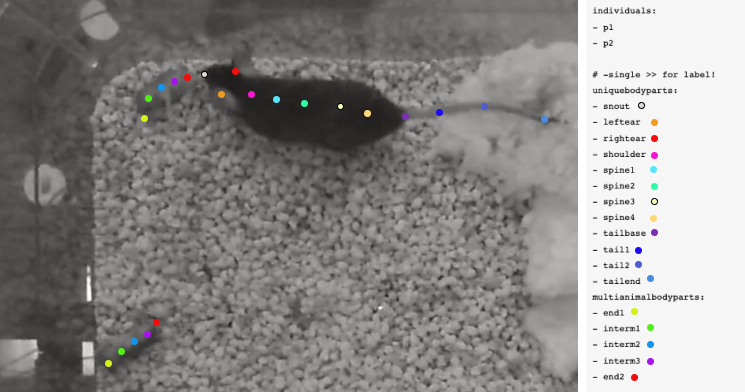

After All of your data is labeled, we will help you merge this and train the model! 🎉💜

# Fine-tuning

- Next, we are going to take everyone's config.yaml file and copy the `video_sets` into one main project folder that has all the videos listed.

- Then, we are going to create a training dataset!

- Next, we are going to load the pretrained weights 🔥. In the folder dlc-models > iteration-0 > projectname > train > you will find`pose_cfg.yaml`.

Here, you need to edit:


```
init_weights: /home/name/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt
```

TO:
```
init_weights: /content/CrackingParenting-Mostafizur-2021-03-24/dlc-models/iteration-0/CrackingParentingMar24-trainset70shuffle1/train/snapshot-60000
```


This will allow you to load the weights of the prior model to start training! 🎉
